1️⃣ Your views about the problem statement?

The goal of this project is to predict the salary of newly hired employees based on various factors like college tier, city type, job role, previous salary, job changes, graduation marks, and experience. Since salary is a continuous numerical value, this is a regression problem in machine learning.

2️⃣ What will be your approach to solving this task?

First, understand and clean the dataset by handling missing values, duplicates, and inconsistencies.
Perform exploratory data analysis (EDA) to find relationships between different features and salary.
Split the data into training and testing sets to evaluate model performance.
Start with Linear Regression as a baseline model, then try other models like Ridge, Lasso, Decision Trees, Random Forest, KNN, and XGBoost.
Compare model performances using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
Optimize the best model using hyperparameter tuning.

3️⃣ What ML model options did you have available to perform this task?
The following regression models were considered:

Linear Regression – Simple and interpretable baseline model.
Ridge Regression – Helps reduce overfitting using L2 regularization.
Lasso Regression – Helps feature selection using L1 regularization.
K-Nearest Neighbors (KNN) – A non-parametric model that predicts salary based on the nearest data points.
Random Forest Regressor – An ensemble learning method that improves accuracy by combining multiple decision trees.
XGBoost Regressor – A powerful gradient boosting model that improves predictive performance.

4️⃣ Which model’s performance is best and what could be the possible reason for that?

The XGBoost Regressor performed the best, with the highest R-squared value and lower errors compared to other models. The possible reasons are:
It automatically handles missing values and feature importance.
It applies gradient boosting, which improves prediction accuracy by correcting errors iteratively.
It reduces overfitting better than individual decision trees or Random Forest.

5️⃣ What steps can you take to improve this selected model’s performance even further?

To further optimize XGBoost, we can:
Fine-tune hyperparameters (e.g., max_depth, learning_rate, n_estimators, gamma, subsample, and reg_alpha).
Use feature engineering by creating meaningful features and removing irrelevant ones.
Apply cross-validation to ensure the model generalizes well to new data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/ML Module project.xlsx")

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier Of College,Metro or Not
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Tier 2,Non-Metro city
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Tier 2,Non-Metro city
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Tier 3,Non-Metro city
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Tier 3,Non-Metro city
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Tier 1,Non-Metro city


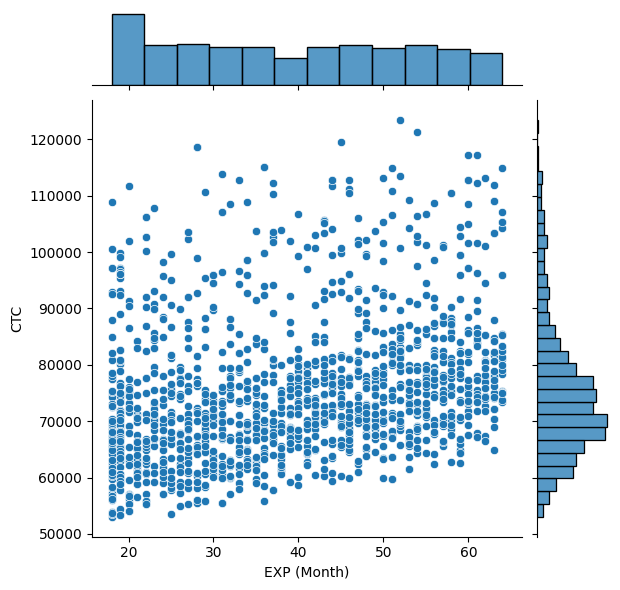

In [ ]:
sns.jointplot(x='EXP (Month)', y= 'CTC', data = df)

<Axes: xlabel='Tier Of College', ylabel='count'>

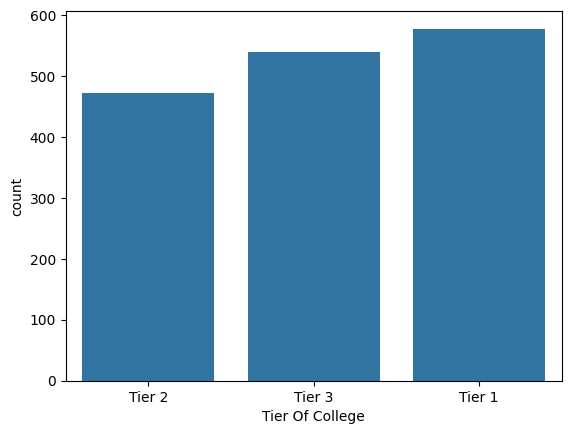

In [ ]:
sns.countplot(x='Tier Of College', data= df)

In [ ]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


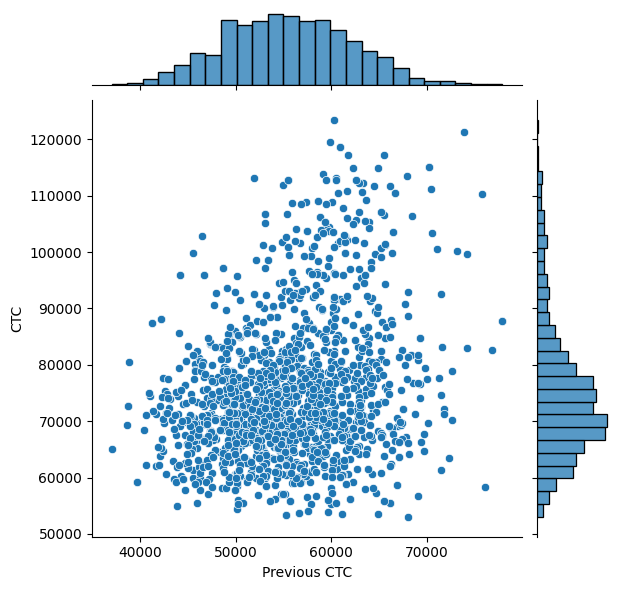

In [ ]:
sns.jointplot(x='Previous CTC', y= 'CTC', data = df)

In [ ]:
df = pd.get_dummies(df, columns=["Tier Of College", "Metro or Not"], dtype=int)

In [ ]:
del df['Tier Of College_Tier 3']

In [ ]:
del df['Metro or Not_Non-Metro city']

In [ ]:
df = pd.get_dummies(df, columns=["Role"], dtype=int)

In [ ]:
del df['Role_Executive']

In [ ]:
df = pd.get_dummies(df, columns=["College", "City"], dtype=int)

In [ ]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier Of College_Tier 1,Tier Of College_Tier 2,Metro or Not_Metro city,Role_Manager,College_Amity University,...,City_Delhi,City_Durgapur,City_Hyderabad,City_Kolhapur,City_Kolkata,City_Kozhikode,City_Pune,City_Rajpur Sonarpur,City_Rourkela,City_Surat
0,55523,3,66,19,71406.58,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,57081,1,84,18,68005.87,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60347,2,52,28,76764.02,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,49010,2,81,33,82092.39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57879,4,74,32,73878.10,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 90 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Previous CTC                                            1589 non-null   int64  
 1   Previous job change                                     1589 non-null   int64  
 2   Graduation Marks                                        1589 non-null   int64  
 3   EXP (Month)                                             1589 non-null   int64  
 4   CTC                                                     1589 non-null   float64
 5   Tier Of College_Tier 1                                  1589 non-null   int64  
 6   Tier Of College_Tier 2                                  1589 non-null   int64  
 7   Metro or Not_Metro city                                 1589 non-null   int64  
 8   Role_Manager                          

In [ ]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier Of College_Tier 1,Tier Of College_Tier 2,Metro or Not_Metro city,Role_Manager,College_Amity University,...,City_Delhi,City_Durgapur,City_Hyderabad,City_Kolhapur,City_Kolkata,City_Kozhikode,City_Pune,City_Rajpur Sonarpur,City_Rourkela,City_Surat
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.031366,-0.010947,0.004644,0.012321,0.011549,...,-0.017202,-0.003688,-0.030977,-0.021772,0.019178,0.028668,0.042239,-0.011181,-0.007044,-0.035861
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.045931,0.004271,0.051670,-0.017150,0.006108,...,0.032678,-0.046157,-0.004814,-0.054835,-0.022832,-0.004480,-0.025504,-0.006882,0.035445,-0.005730
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.005666,-0.018419,-0.018616,0.017858,0.014417,...,0.061456,0.014165,-0.034785,-0.001552,-0.052533,-0.016352,0.002584,-0.015469,0.036303,-0.010010
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.003323,-0.014558,-0.023613,-0.026751,0.058674,...,0.025740,0.022791,-0.009676,-0.001399,0.006607,0.051120,-0.014732,-0.011315,-0.007474,-0.005302
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.019912,0.012346,-0.020365,0.621311,0.019569,...,0.004956,0.023224,-0.000590,-0.011628,-0.000217,0.031065,0.001431,0.014825,0.005260,-0.014525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Kozhikode,0.028668,-0.004480,-0.016352,0.051120,0.031065,0.006188,-0.049518,-0.272242,0.028496,0.014991,...,-0.070393,-0.076655,-0.062913,-0.073572,-0.067847,1.000000,-0.065605,-0.071464,-0.073223,-0.071108
City_Pune,0.042239,-0.025504,0.002584,-0.014732,0.001431,0.008597,-0.025521,0.240980,-0.019910,-0.017207,...,-0.065942,-0.071807,-0.058934,-0.068919,-0.063556,-0.065605,1.000000,-0.066945,-0.068593,-0.066612
City_Rajpur Sonarpur,-0.011181,-0.006882,-0.015469,-0.011315,0.014825,0.008913,0.010503,-0.277803,0.041433,-0.021793,...,-0.071831,-0.078220,-0.064198,-0.075074,-0.069232,-0.071464,-0.066945,1.000000,-0.074719,-0.072561
City_Rourkela,-0.007044,0.035445,0.036303,-0.007474,0.005260,-0.041247,0.023761,-0.284642,-0.014068,0.011216,...,-0.073599,-0.080146,-0.065778,-0.076922,-0.070937,-0.073223,-0.068593,-0.074719,1.000000,-0.074347


Split Your Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# I am Specifying numeric columns for scaling
numeric_features = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)']

X = df.drop(columns=['CTC'])  # Features
y = df['CTC']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data (only numeric features)
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform the test data (only numeric features)
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Now, my data is scaled and ready for modeling


Multi Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(lr_model.intercept_, lr_model.coef_)

Mean Absolute Error: 6878.360988597248
Mean Squared Error: 77540888.07663825
R-squared: 0.4842232713543545
70544.98085931498 [ 2537.59314778   224.77595838   -98.27724504  3629.49471268
   825.94673454   831.24791016   392.15954154 19959.46422253
   514.14791929 -1502.94405461  -943.28094889  -633.21608655
  2600.67479205  1081.93657519  -616.86470959  -201.10236449
  1523.80112739  2159.75611774 -1494.10187029 -1629.7609342
    74.96577921  -124.66103194 -5857.21125712 -1280.93620656
  -207.50582412  3978.66291476  3879.14164495  6334.89912997
 -1687.8310695   -201.03194865   823.12726974 -1225.79556185
  -564.54649438  -416.96678665 -3003.58231244  -353.81154735
 -3350.0019878  -3095.70020149 -2458.06690617  -506.91801795
   485.84361401   543.87540417 -1862.70631848 -3086.9468968
 -1057.75071302 -4274.23467972 -1144.79730531  2190.17144732
 -1477.03633253 -1166.62179722 -3670.47737907  2651.76920857
  1727.33194188 -2113.65282251  2130.27041174  -991.59523338
 -1280.58813679   871.3

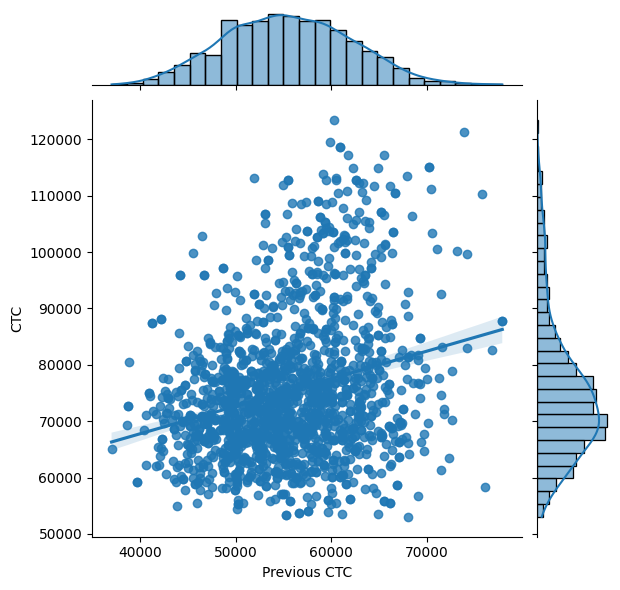

In [ ]:
sns.jointplot(x='Previous CTC', y= 'CTC', data = df, kind = 'reg')

Using Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # You can tune alpha later
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(lasso_model.intercept_, lasso_model.coef_)

Mean Absolute Error: 6870.587129683714
Mean Squared Error: 77305123.92120941
R-squared: 0.48579149771641017
70709.89883404277 [ 2.54042110e+03  2.23325588e+02 -9.65915866e+01  3.63132598e+03
  5.72090259e+02  7.94116787e+02  3.07688962e+02  1.99601023e+04
  6.01819115e+02 -1.31197630e+03 -6.75999182e+02 -2.06897986e+02
  2.92964095e+03  1.39867749e+03 -4.27786558e+02 -1.71359316e+01
  1.56609036e+03  2.48069537e+03 -1.31652068e+03 -1.41393980e+03
  1.51511596e+02  0.00000000e+00 -5.58056505e+03 -8.38206131e+02
 -0.00000000e+00  4.31050898e+03  3.92781664e+03  6.39990579e+03
 -1.41348523e+03  1.26596664e+02  1.16170879e+03 -7.79601767e+02
 -1.08305905e+02 -0.00000000e+00 -2.54144470e+03  0.00000000e+00
 -2.90008022e+03 -2.64378866e+03 -2.02795704e+03 -6.77738336e+01
  5.81807366e+02  6.28535345e+02 -1.69590792e+03 -2.81026963e+03
 -8.57792571e+02 -4.02927100e+03 -9.06707331e+02  2.25391168e+03
 -1.28611604e+03 -8.89084405e+02 -3.38599884e+03  2.73678666e+03
  1.75451923e+03 -1.87638744e

K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
mse_knn = mean_squared_error(y_test, y_test_pred_knn)
r2_knn = r2_score(y_test, y_test_pred_knn)

# Print the results
print(f"KNN Model:")
print(f"Mean Absolute Error: {mae_knn}")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")


KNN Model:
Mean Absolute Error: 8495.435452830186
Mean Squared Error: 127574364.82732703
R-squared: 0.15141688234662842


Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reinitialize X and y
X = df.drop(columns=['CTC'])  # Features
y = df['CTC']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=29)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 6107.710854402512
Mean Squared Error: 61536374.882066354
R-squared: 0.5906800796759679


XGBoost

In [ ]:
!pip install --upgrade xgboost scikit-learn


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    n_jobs=-1,
    gamma=0.1,
    subsample=0.8,
    reg_alpha=0.1
)

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")



Mean Absolute Error: 6032.100514937107
Mean Squared Error: 61266808.57727955
R-squared: 0.5924731469245481


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'subsample': 0.8, 'reg_alpha': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [ ]:
# Train XGBoost with best hyperparameters
xgb_best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    subsample=0.8,
    reg_alpha=1.0,
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.6
)

xgb_best_model.fit(X_train, y_train)

# Make predictions
y_train_pred_best = xgb_best_model.predict(X_train)
y_test_pred_best = xgb_best_model.predict(X_test)

# Evaluate the final model
mae_best = mean_absolute_error(y_test, y_test_pred_best)
mse_best = mean_squared_error(y_test, y_test_pred_best)
r2_best = r2_score(y_test, y_test_pred_best)

# Print performance metrics
print(f"🔹 Mean Absolute Error (MAE): {mae_best}")
print(f"🔹 Mean Squared Error (MSE): {mse_best}")
print(f"🔹 R-squared (R²): {r2_best}")


🔹 Mean Absolute Error (MAE): 6157.846313875786
🔹 Mean Squared Error (MSE): 61876172.90910993
🔹 R-squared (R²): 0.588419853888825


In [ ]:
xgb_best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    subsample=0.8,
    reg_alpha=1.0,
    n_estimators=100,  # Increase from 50 to 100 , help in more capture
    max_depth=3,  # Reduce from 5 to 3 ,less complex (to avoid overfitting)
    learning_rate=0.05,  # Reduce from 0.1 to 0.05 , lower value helps stabilty
    gamma=0.1,
    colsample_bytree=0.6
)

xgb_best_model.fit(X_train, y_train)

y_test_pred_best = xgb_best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_test_pred_best)
mse_best = mean_squared_error(y_test, y_test_pred_best)
r2_best = r2_score(y_test, y_test_pred_best)

print(f"🔹 Mean Absolute Error (MAE): {mae_best}")
print(f"🔹 Mean Squared Error (MSE): {mse_best}")
print(f"🔹 R-squared (R²): {r2_best}")


🔹 Mean Absolute Error (MAE): 5971.19500245676
🔹 Mean Squared Error (MSE): 59709493.494490184
🔹 R-squared (R²): 0.6028318995619661
